<a href="https://colab.research.google.com/github/egy1st/denmune-clustering-algorithm/blob/main/colab/training_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import time
import os.path

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# install DenMune clustering algorithm using pip command from the offecial Python repository, PyPi
# from https://pypi.org/project/denmune/
!pip install denmune

# then import it
from denmune import DenMune

In [4]:
# clone datasets from our repository datasets
if not os.path.exists('datasets'):
  !git clone https://github.com/egy1st/datasets

Cloning into 'datasets'...
remote: Enumerating objects: 63, done.
remote: Counting objects: 100% (63/63), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 63 (delta 10), reused 59 (delta 9), pack-reused 0
Unpacking objects: 100% (63/63), done.


In [5]:
# let us train the dataset

data_path = 'datasets/denmune/mnist/'  
file_2d = data_path + 'mnist-2d.csv'

X_train = pd.read_csv(data_path + 'train.csv', sep=',')
X_test = pd.read_csv(data_path + 'test.csv',  sep=',')
y_train = X_train['label']
X_train = X_train.drop(['label'], axis=1)

validity_key = "F1" 
scores = []
score = 0
best_knn = 0
best_score = -1

for knn in range (48, 50):   # knn ==> k-nearest neighbor, the only parameter required by the algorithm
  dm = DenMune(train_data=X_train,
              train_truth=y_train,
              test_data=X_test, 
              k_nearest=knn,
              file_2d=file_2d,
              rgn_tsne=False)

  labels, validity = dm.fit_predict(show_plots=False, show_analyzer=False)
  score = validity['train'][validity_key]

  if score > best_score:
    best_score = score
    best_knn = knn

  print ('k=' , knn, validity_key , 'score:', round(score*100,2) , '%, best score:',  round(best_score*100,2) , '% at k=', best_knn)
  scores.append([knn, score])


k= 10 F1 score: 88.92 %, best score: 88.92 % at k= 10
k= 11 F1 score: 90.14 %, best score: 90.14 % at k= 11
k= 12 F1 score: 90.97 %, best score: 90.97 % at k= 12
k= 13 F1 score: 91.97 %, best score: 91.97 % at k= 13
k= 14 F1 score: 92.3 %, best score: 92.3 % at k= 14
k= 15 F1 score: 92.58 %, best score: 92.58 % at k= 15
k= 16 F1 score: 91.77 %, best score: 92.58 % at k= 15
k= 17 F1 score: 94.07 %, best score: 94.07 % at k= 17
k= 18 F1 score: 92.89 %, best score: 94.07 % at k= 17
k= 19 F1 score: 93.7 %, best score: 94.07 % at k= 17
k= 20 F1 score: 94.57 %, best score: 94.57 % at k= 20
k= 21 F1 score: 80.54 %, best score: 94.57 % at k= 20
k= 22 F1 score: 93.18 %, best score: 94.57 % at k= 20
k= 23 F1 score: 94.91 %, best score: 94.91 % at k= 23
k= 24 F1 score: 94.43 %, best score: 94.91 % at k= 23
k= 25 F1 score: 95.1 %, best score: 95.1 % at k= 25
k= 26 F1 score: 93.68 %, best score: 95.1 % at k= 25
k= 27 F1 score: 93.09 %, best score: 95.1 % at k= 25
k= 28 F1 score: 83.83 %, best score

Plotting dataset Groundtruth


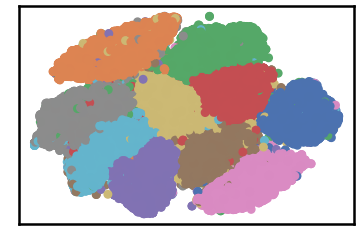

Plotting train data


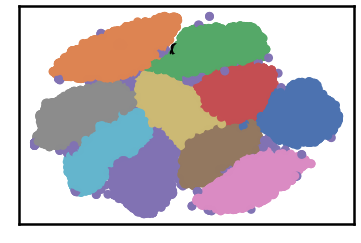

Validating train data
├── exec_time
│   ├── DenMune: 95.723
│   ├── NGT: 8.561
│   └── t_SNE: 0
├── n_clusters
│   ├── actual: 10
│   └── detected: 11
├── n_points
│   ├── dim: 784
│   ├── noise
│   │   ├── type-1: 5
│   │   └── type-2: 0
│   ├── plot_size: 42000
│   ├── size: 70000
│   ├── strong: 37447
│   └── weak
│       ├── all: 32553
│       ├── failed to merge: 0
│       └── succeeded to merge: 32553
└── validity
    └── train
        ├── ACC: 40386
        ├── AMI: 0.905
        ├── ARI: 0.919
        ├── F1: 0.962
        ├── NMI: 0.905
        ├── completeness: 0.904
        └── homogeneity: 0.906

Plotting test data


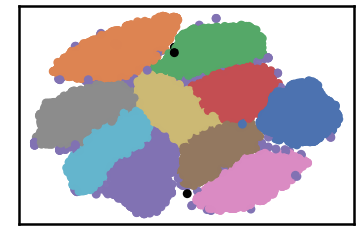

In [9]:
# now let us use our best_knn which corresponds to best_score for our test data prediction
#best_knn ==> 48

dm = DenMune(train_data=X_train,
              train_truth=y_train,
              test_data=X_test, 
              k_nearest=best_knn,
              file_2d=file_2d,
              rgn_tsne=False)

labels, validity = dm.fit_predict(show_plots=True, show_analyzer=True)

In [10]:
# prepare our output to be submitted to the dataset kaggle competition
ImageID = np.arange(len(X_test))+1
Out = pd.DataFrame([ImageID,labels['test']]).T
Out.to_csv('submission.csv', header =  ['ImageId', 'Label' ], index = None)
